# Federato RiskOps Platform Optimization Challenge

### Importing required libraries

In [1]:
%%time
import ast
import ijson
import json
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as new_export
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import MaxNLocator

CPU times: user 1.43 s, sys: 697 ms, total: 2.12 s
Wall time: 699 ms


### Given code to extract and turn .json files into .csv

In [ ]:
#file year 
year = 2025
file_path = f"new_amplitude_export_{year}.json"

#non-empty columns
columns_keep = [
    "$insert_id",
    "amplitude_id",
    "app",
    "city",
    "client_event_time",
    "client_upload_time",
    "country",
    "data",
    "data_type",
    "device_family",
    "device_id",
    "device_type",
    "dma",
    "event_id",
    "event_properties",
    "event_time",
    "event_type",
    "language",
    "library",
    "os_name",
    "os_version",
    "platform",
    "processed_time",
    "region",
    "server_received_time",
    "server_upload_time",
    "session_id",
    "user_id",
    "user_properties",
    "uuid",
]
path = Path(f"{year}_csv")
if not path.exists():
    path.mkdir(parents=True, exist_ok=True)
#use ijson to read the json files efficiently in memory
with open(file_path, "r") as f:
    objects = ijson.items(f, "item") #creates a generator object
    
    batch_size = 100000 #can be updated, currently saves per batches of 100,000
    chunk = []
    count = 0 #used to index batch file
    for obj in objects:
        chunk.append(obj)
        if len(chunk) >= batch_size:
            df = pd.DataFrame(chunk)
            output_csv = f"{year}_csv/{file_path.split('.')[0]}_chunk_{count*batch_size}_{(count+1)*batch_size}.csv"
            df = df[columns_keep] #remove empty columns
            df.to_csv(output_csv, index=False)
            count += 1
            chunk = []

    if chunk: #process remaining data if any
        output_csv = f"{year}_csv/{file_path.split('.')[0]}_chunk_{count*batch_size}_{(count+1)*batch_size}.csv"
        df = pd.DataFrame(chunk)
        df = df[columns_keep]
        df.to_csv(output_csv, index=False)


In [ ]:
#file chunk 
part = 1
file_path = f"new_export/amplitude_export_chunk_{part}_anonymized.json"

#non-empty columns
columns_keep = [
    "$insert_id",
    "amplitude_id",
    "app",
    "city",
    "client_event_time",
    "client_upload_time",
    "country",
    "data",
    "data_type",
    "device_family",
    "device_id",
    "device_type",
    "dma",
    "event_id",
    "event_properties",
    "event_time",
    "event_type",
    "language",
    "library",
    "os_name",
    "os_version",
    "platform",
    "processed_time",
    "region",
    "server_received_time",
    "server_upload_time",
    "session_id",
    "user_id",
    "user_properties",
    "uuid",
]

path = Path(f"{part}_csv")
if not path.exists():
    path.mkdir(parents=True, exist_ok=True)

#use ijson to read the json files efficiently in memory
with open(file_path, "r") as f:
    objects = ijson.items(f, "item") #creates a generator object
    
    batch_size = 100000 #can be updated, currently saves per batches of 100,000
    chunk = []
    count = 0 #used to index batch file
    for obj in objects:
        chunk.append(obj)
        if len(chunk) >= batch_size:
            df = pd.DataFrame(chunk)
            output_csv = f"{part}_csv/{file_path.split('/')[1].split('.')[0]}_subchunk_{count*batch_size}_{(count+1)*batch_size}.csv"
            df = df[columns_keep] #remove empty columns
            df.to_csv(output_csv, index=False)
            count += 1
            chunk = []

    if chunk: #process remaining data if any
        output_csv = f"{part}_csv/{file_path.split('/')[1].split('.')[0]}_subchunk_{count*batch_size}_{(count+1)*batch_size}.csv"
        df = pd.DataFrame(chunk)
        print(df.shape)
        df = df[columns_keep]
        print(df.shape)
        df.to_csv(output_csv, index=False)


# Examining Data
### Type of data, columns, etc.
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

In [2]:
df = pd.read_csv('1_csv/amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv')

df.head()

,$insert_id,amplitude_id,app,city,client_event_time,client_upload_time,country,data,data_type,device_family,...,os_version,platform,processed_time,region,server_received_time,server_upload_time,session_id,user_id,user_properties,uuid
0,b5aa91c6-ac17-4bfe-8def-df50869540b0,857540442426,591532,Covington,2024-06-14 23:06:34.898000,2024-06-14 23:06:35.998000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125,Web,2024-06-14 23:06:36.809000,Georgia,2024-06-14 23:06:35.998000,2024-06-14 23:06:36.007000,1718399623706,01708ccf-437b-44ed-b5a0-2fed8f7761d3,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",f10e3860-18f7-4e43-93d9-29bda5edb636
1,dc6c6dd1-8c20-4faf-8996-5fc532120b81,857540442426,591532,Covington,2024-06-14 23:06:34.926000,2024-06-14 23:06:35.998000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125,Web,2024-06-14 23:06:36.809000,Georgia,2024-06-14 23:06:35.998000,2024-06-14 23:06:36.007000,1718399623706,01708ccf-437b-44ed-b5a0-2fed8f7761d3,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",38e1d5ef-96c5-4a37-bd51-dcc9808b4c00
2,d4f63da1-2385-4683-b387-06b7e75d908b,857540442426,591532,Covington,2024-06-14 23:06:34.929000,2024-06-14 23:06:35.998000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125,Web,2024-06-14 23:06:36.809000,Georgia,2024-06-14 23:06:35.998000,2024-06-14 23:06:36.007000,1718399623706,01708ccf-437b-44ed-b5a0-2fed8f7761d3,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",39f12443-51ce-493e-a66a-19052bdbabd6
3,3bc7a189-4bc6-4fe7-a839-4c5c5da0e7e6,857540442426,591532,Covington,2024-06-14 23:06:34.929000,2024-06-14 23:06:35.998000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125,Web,2024-06-14 23:06:36.809000,Georgia,2024-06-14 23:06:35.998000,2024-06-14 23:06:36.007000,1718399623706,01708ccf-437b-44ed-b5a0-2fed8f7761d3,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",01776264-d664-4fce-8ce1-71b97ddba191
4,a1093d16-e49c-4006-aea7-1c04d5e668ca,857540442426,591532,Covington,2024-06-14 23:06:34.944000,2024-06-14 23:06:35.998000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,125,Web,2024-06-14 23:06:36.809000,Georgia,2024-06-14 23:06:35.998000,2024-06-14 23:06:36.007000,1718399623706,01708ccf-437b-44ed-b5a0-2fed8f7761d3,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",963e97cb-3c8a-4efa-b52d-8713ca9b8459


In [3]:
df.columns

Index(['$insert_id', 'amplitude_id', 'app', 'city', 'client_event_time',
       'client_upload_time', 'country', 'data', 'data_type', 'device_family',
       'device_id', 'device_type', 'dma', 'event_id', 'event_properties',
       'event_time', 'event_type', 'language', 'library', 'os_name',
       'os_version', 'platform', 'processed_time', 'region',
       'server_received_time', 'server_upload_time', 'session_id', 'user_id',
       'user_properties', 'uuid'],
      dtype='object')

### Data Categories
**Numerical:**
'amplitude_id', 'app', 'event_id'

**Categorical:**
'city', 'country', 'device_family', 'device_type', 'dma', 
'event_type', 'language', 'library', 'os_name', 'os_version', 
'platform', 'region', 'user_id', 'session_id'

**Datetime:**
'client_event_time', 'client_upload_time', 'event_time', 
'server_received_time', 'server_upload_time'

**Mixed:**
'$insert_id', 'data', 'data_type', 'event_properties', 'user_properties', 'uuid'

# Exploratory Data Analysis (EDA) & Insights on a Single Dataset
### Examining Region Column
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

Unique values in 'region':

Value counts for 'region':
region
Tennessee                              26553
Maharashtra                            18308
Illinois                                7016
South Carolina                          6688
Georgia                                 4527
Virginia                                4494
Ohio                                    3991
Iowa                                    3675
New York                                3406
Florida                                 2651
California                              2395
Lower Silesia                           2063
Texas                                   1871
North Carolina                          1553
Colorado                                1548
Ontario                                 1281
Massachusetts                           1103
Michigan                                 877
Wisconsin                                838
Alabama                                  794
Connecticut                           

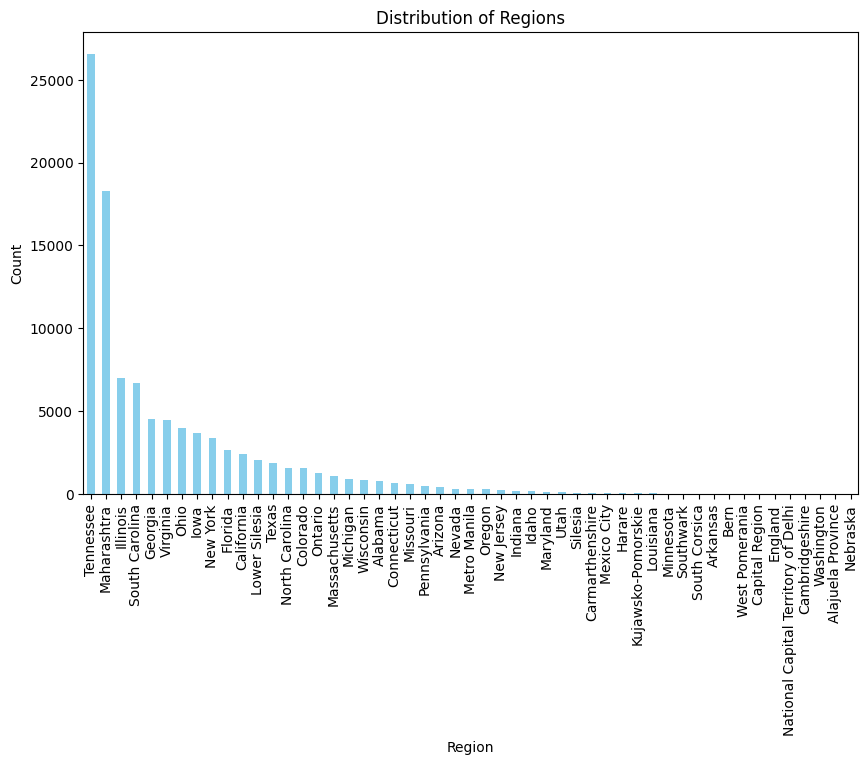


Number of missing values in 'region': 2


In [4]:
# Unique values in the 'region' column
print("Unique values in 'region':")

# Value counts for the 'region' column
region_counts = df['region'].value_counts()
print("\nValue counts for 'region':")
print(region_counts)

# Distribution of regions (bar plot)
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Missing values in the 'region' column
missing_values = df['region'].isnull().sum()
print(f"\nNumber of missing values in 'region': {missing_values}")

### Examining os_version Column
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

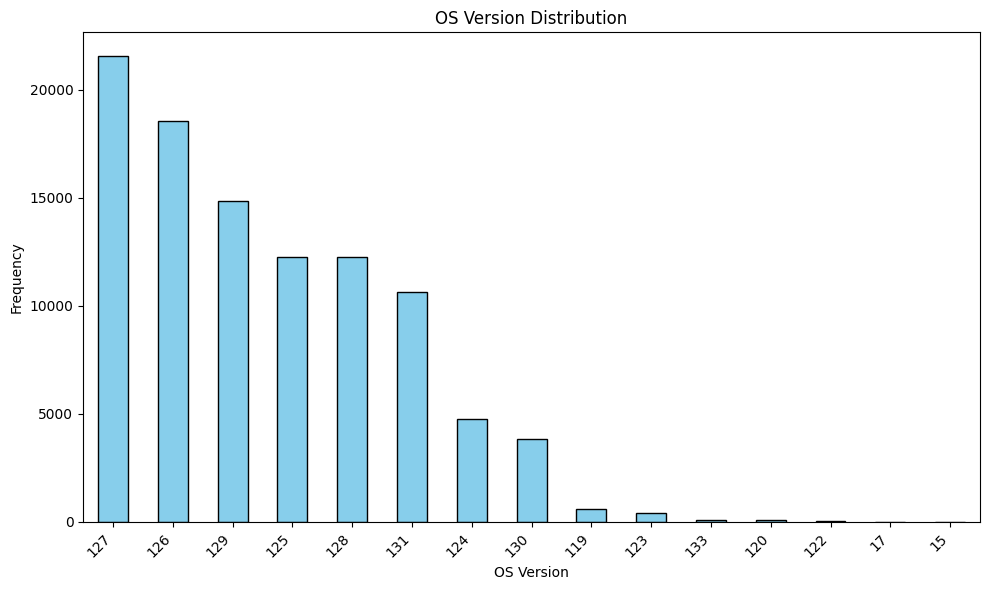

In [5]:
# Clean the 'os_version' column by extracting the first part of the version number
df['os_version'] = df['os_version'].apply(lambda x: str(x).split('.')[0] if isinstance(x, str) else str(x))

# Value counts for 'os_version'
value_counts = df['os_version'].value_counts()

# Plot the distribution of 'os_version' as a bar plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('OS Version Distribution')
plt.xlabel('OS Version')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Examining platform Column
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

In [6]:
# Missing values in 'platform' column
missing_values = df['platform'].isnull().sum()

# Unique values in 'platform'
unique_values = df['platform'].unique()

# Value counts for 'platform'
platform_counts = df['platform'].value_counts()

# Display the results
print(f"Missing values in 'platform': {missing_values}")
print(f"Unique values in 'platform': {unique_values}")
print("\nValue counts for 'platform':\n", platform_counts)

Missing values in 'platform': 0
Unique values in 'platform': ['Web']

Value counts for 'platform':
 platform
Web    100000
Name: count, dtype: int64


### Examining os_name Column
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

Missing values in 'os_name': 0
Unique values in 'os_name': ['Chrome' 'Edge' 'Firefox' 'Chrome Mobile iOS' 'Mobile Safari' 'Safari']

Value counts for 'os_name':
 os_name
Chrome               93855
Edge                  5778
Firefox                326
Mobile Safari           22
Chrome Mobile iOS       12
Safari                   7
Name: count, dtype: int64


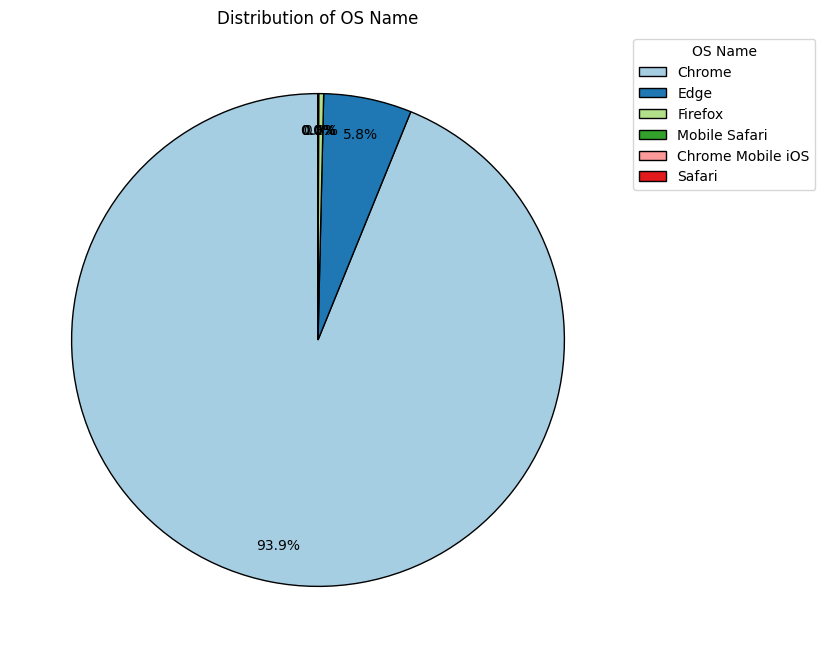

In [7]:
# Check for missing values in 'os_name' column
missing_values = df['os_name'].isnull().sum()

# Unique values in 'os_name'
unique_values = df['os_name'].unique()

# Value counts for 'os_name'
os_name_counts = df['os_name'].value_counts()

# Display the results
print(f"Missing values in 'os_name': {missing_values}")
print(f"Unique values in 'os_name': {unique_values}")
print("\nValue counts for 'os_name':\n", os_name_counts)

# Count the occurrences of each unique value in 'os_name'
os_name_counts = df['os_name'].value_counts()

plt.figure(figsize=(10, 8))

# Create the pie chart without the text labels
plt.pie(os_name_counts, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors,
        wedgeprops={'edgecolor': 'black'},
        pctdistance=0.85)

# Add a legend (key box) with the 'os_name' labels and their respective counts
plt.legend(os_name_counts.index, 
           title="OS Name", 
           loc="upper left", 
           bbox_to_anchor=(1, 1), 
           fontsize=10)

plt.title('Distribution of OS Name')
plt.show()

### Examining device_type Column
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

Unique values in 'device_type': ['Windows' 'Linux' nan 'Mac']

Frequency distribution:
 device_type
Windows    80669
Linux       1184
Mac          649
Name: count, dtype: int64

Missing values: 17498

Summary Statistics:
 count       82502
unique          3
top       Windows
freq        80669
Name: device_type, dtype: object


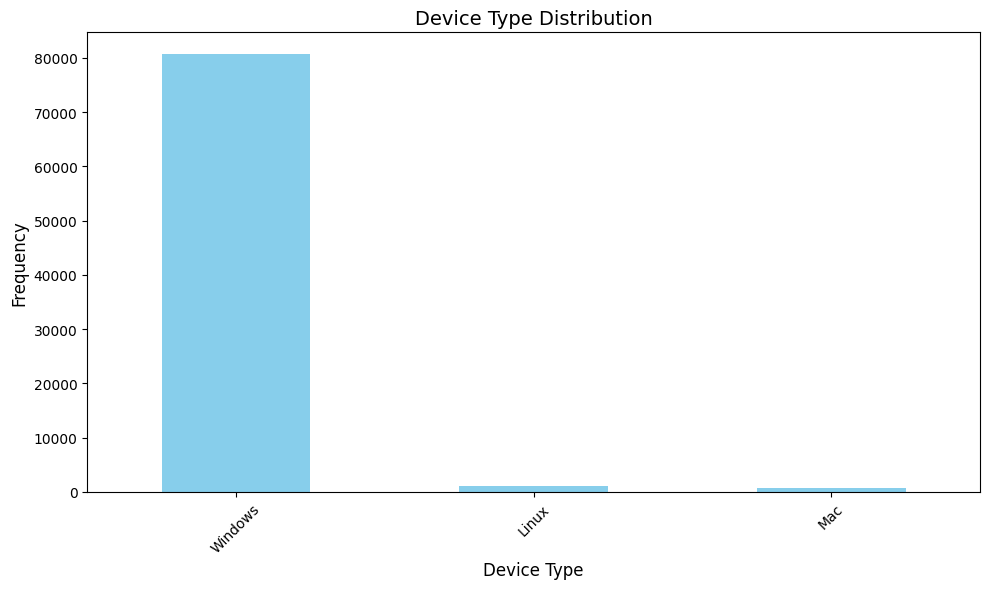

In [8]:
# Unique Values
unique_device_types = df['device_type'].unique()
print("Unique values in 'device_type':", unique_device_types)

# Frequency Distribution
device_type_freq = df['device_type'].value_counts()
print("\nFrequency distribution:\n", device_type_freq)

# Missing Values
missing_device_types = df['device_type'].isnull().sum()
print("\nMissing values:", missing_device_types)

# Summary Statistics
device_type_summary = df['device_type'].describe()
print("\nSummary Statistics:\n", device_type_summary)


# Plot the frequency distribution
plt.figure(figsize=(10, 6))
device_type_freq = df['device_type'].value_counts()
device_type_freq.plot(kind='bar', color='skyblue')

# Add title and labels
plt.title('Device Type Distribution', fontsize=14)
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Examining device_family Column
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

Missing values in 'device_family': 0
Device Family Distribution:
device_family
Windows     80669
Mac OS X    17464
Linux        1184
Mac           649
iOS            34
Name: count, dtype: int64


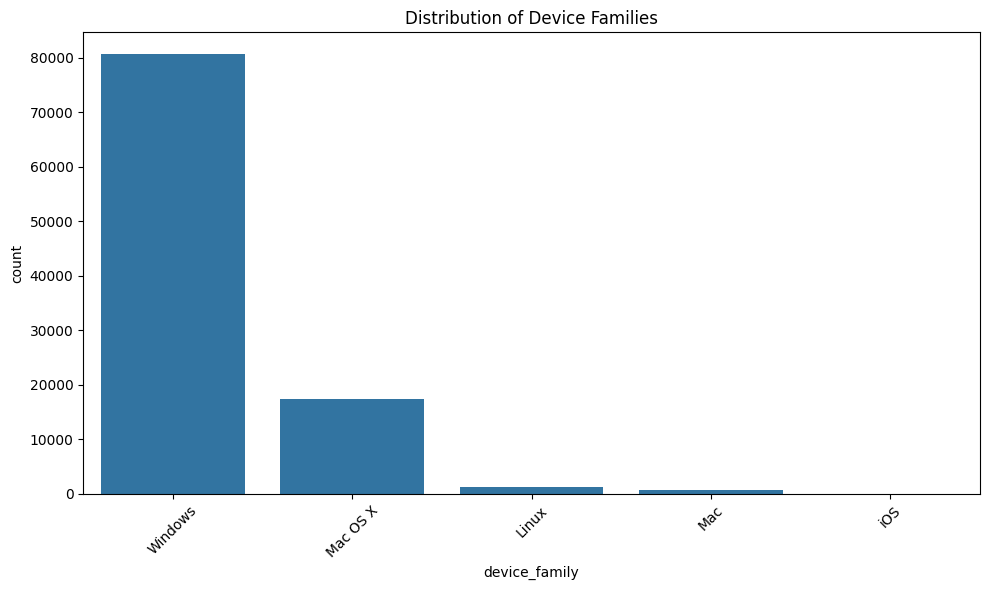

Device Families:
device_family
Windows     80669
Mac OS X    17464
Linux        1184
Mac           649
iOS            34
Name: count, dtype: int64


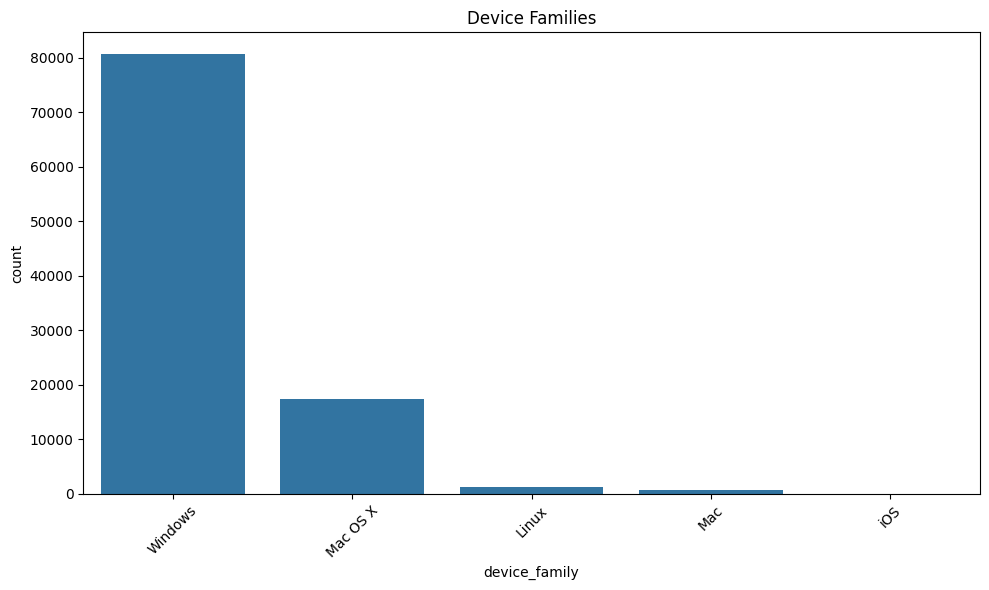

In [9]:
# Check for missing values in the 'device_family' column
missing_values = df['device_family'].isnull().sum()
print(f"Missing values in 'device_family': {missing_values}")

# Distribution of the 'device_family' column
device_family_counts = df['device_family'].value_counts()
print(f"Device Family Distribution:\n{device_family_counts}")

# Plot the distribution of device families
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='device_family', order=device_family_counts.index)
plt.title('Distribution of Device Families')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the device families
top_device_families = device_family_counts.head(10)
print(f"Device Families:\n{top_device_families}")

# 5. Plot device families
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='device_family', order=top_device_families.index)
plt.title('Device Families')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Examining country Column
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

country
United States     77670
India             18317
Poland             2192
Canada             1281
Philippines         277
United Kingdom      112
Mexico               69
Zimbabwe             35
France               19
Switzerland          15
Denmark              12
Costa Rica            1
Name: count, dtype: int64
Missing values in 'country' column: 0


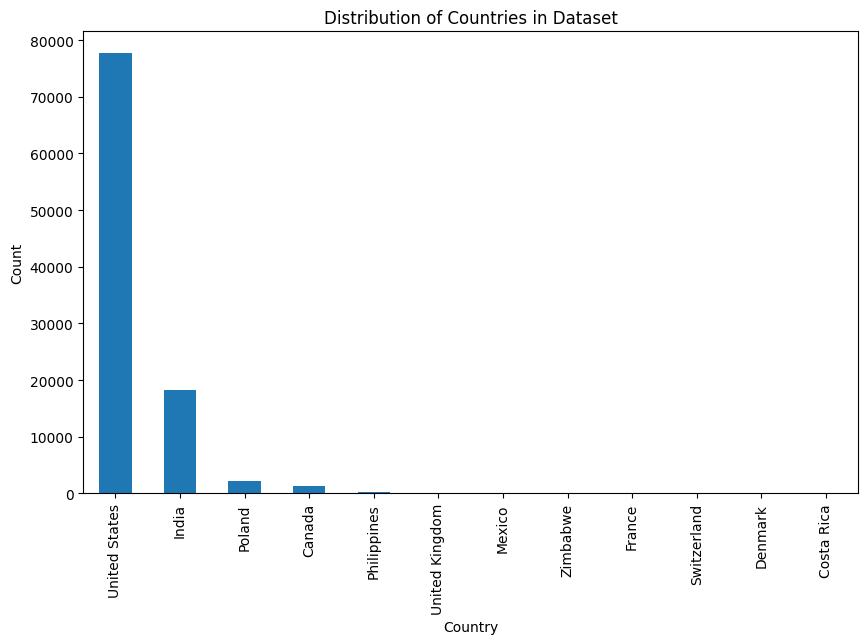

Unique countries in the dataset: ['United States' 'India' 'Poland' 'Canada' 'United Kingdom' 'France'
 'Mexico' 'Denmark' 'Switzerland' 'Philippines' 'Costa Rica' 'Zimbabwe']
Number of unique countries: 12


In [10]:
country_counts = df['country'].value_counts()
print(country_counts)

# Check for missing values
missing_values = df['country'].isnull().sum()
print(f"Missing values in 'country' column: {missing_values}")

# Visualize the distribution of countries
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Distribution of Countries in Dataset')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# Check for unique country names
unique_countries = df['country'].unique()
print(f"Unique countries in the dataset: {unique_countries}")

unique_countries = df['country'].nunique()
print("Number of unique countries:", unique_countries)

### Examining city Column
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

Missing values in city column: 540
Number of unique cities: 204
Top 10 most frequent cities:
city
Nashville       25298
Mumbai          18308
Chicago          6385
Greenville       3631
Alexandria       2992
New York         2624
Atlanta          2229
Wroclaw          2063
Twinsburg        1276
Simpsonville     1273
Name: count, dtype: int64


/var/folders/rw/2_yr05hd56b1rkq4976bf6w00000gn/T/ipykernel_36549/2289332653.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')


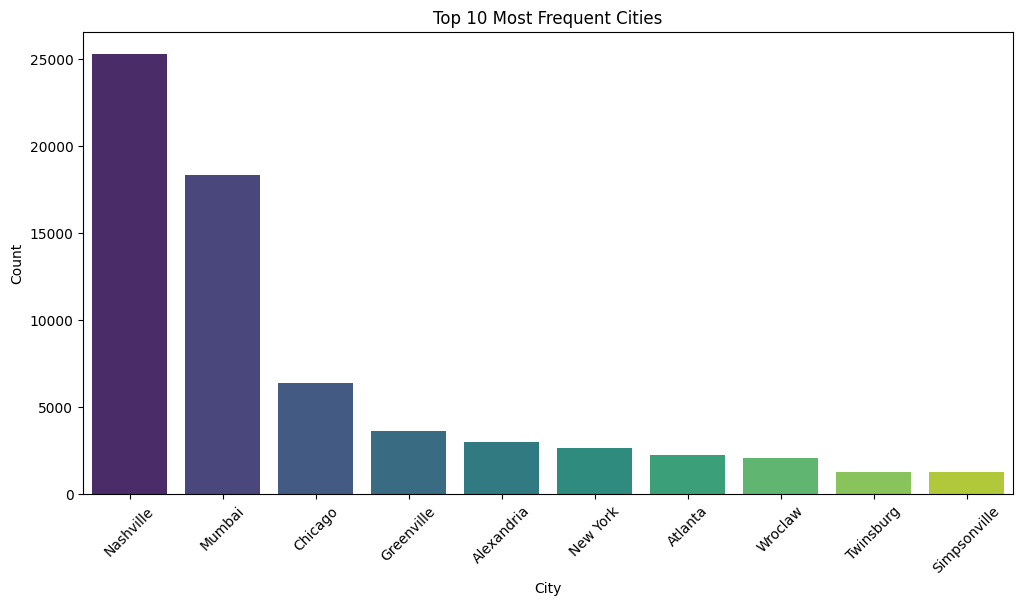

In [11]:
# Check for missing values in the 'city' column
missing_values = df['city'].isnull().sum()
print(f'Missing values in city column: {missing_values}')

# Drop rows with missing 'city' values
df_cleaned = df.dropna(subset=['city'])

# Get the count of unique cities
unique_cities_count = df_cleaned['city'].nunique()
print(f'Number of unique cities: {unique_cities_count}')

# Get the top 10 most frequent cities
top_cities = df_cleaned['city'].value_counts().head(10)
print(f'Top 10 most frequent cities:\n{top_cities}')

# Plot the top 10 most frequent cities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='viridis')
plt.title('Top 10 Most Frequent Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Examining language Column
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

Missing values in language column: 0


Number of unique languages: 3
Top 10 most frequent languages:
language
English    98725
Polish      1191
Spanish       84
Name: count, dtype: int64


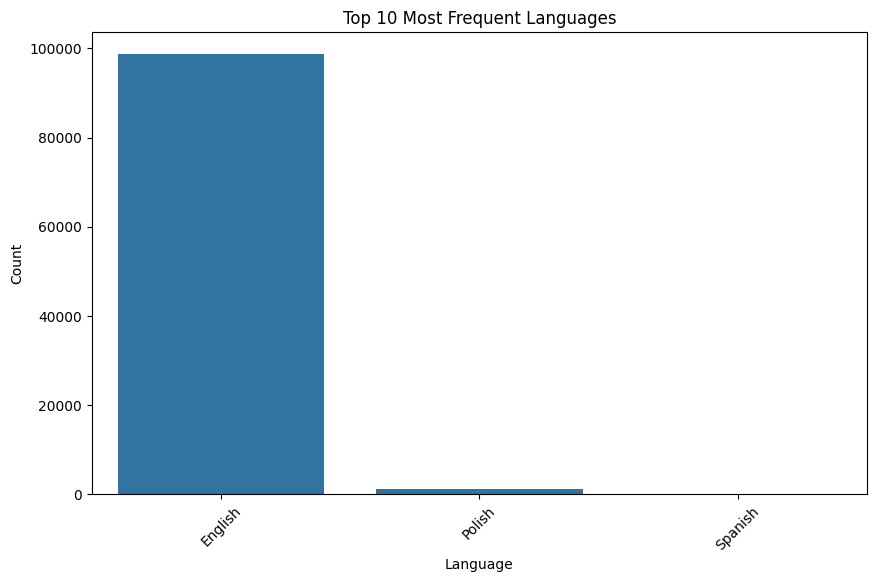

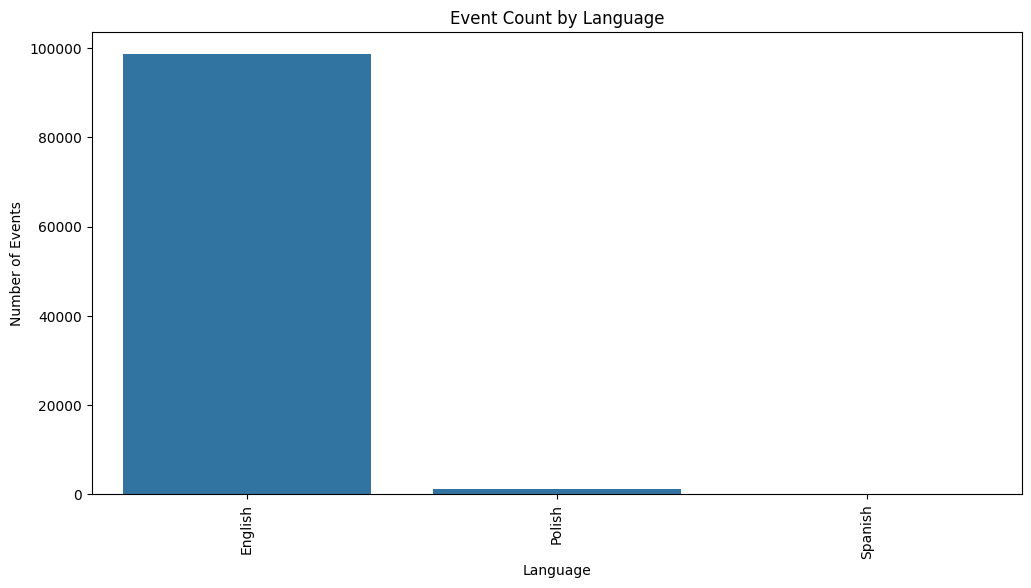

In [12]:
# Check for missing values
print(f'Missing values in language column: {df["language"].isnull().sum()}')

# Clean the data (remove rows with missing language values)
df_cleaned = df.dropna(subset=['language'])

# Unique languages count and most frequent languages
print(f'Number of unique languages: {df_cleaned["language"].nunique()}')
top_languages = df_cleaned['language'].value_counts().head(10)
print(f'Top 10 most frequent languages:\n{top_languages}')

# Plot top 10 most frequent languages
plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.index, y=top_languages.values)
plt.title('Top 10 Most Frequent Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of events by language
plt.figure(figsize=(12, 6))
sns.countplot(x='language', data=df_cleaned)
plt.title('Event Count by Language')
plt.xlabel('Language')
plt.ylabel('Number of Events')
plt.xticks(rotation=90)
plt.show()

### Examining dma Column
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

Missing values in dma column: 22870
Number of unique DMAs: 62
Top 10 most frequent DMAs:
dma
Nashville, TN                      25303
Chicago, IL                         6904
Greenville-Spartanburg, SC          6217
Atlanta, GA                         4400
Washington, DC (Hagerstown, MD)     4103
Des Moines-Ames, IA                 3664
New York, NY                        3456
Cleveland-Akron (Canton), OH        2875
Denver, CO                          1548
Charlotte, NC                       1369
Name: count, dtype: int64


/var/folders/rw/2_yr05hd56b1rkq4976bf6w00000gn/T/ipykernel_36549/3083008071.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dma.index, y=top_dma.values, palette='viridis')


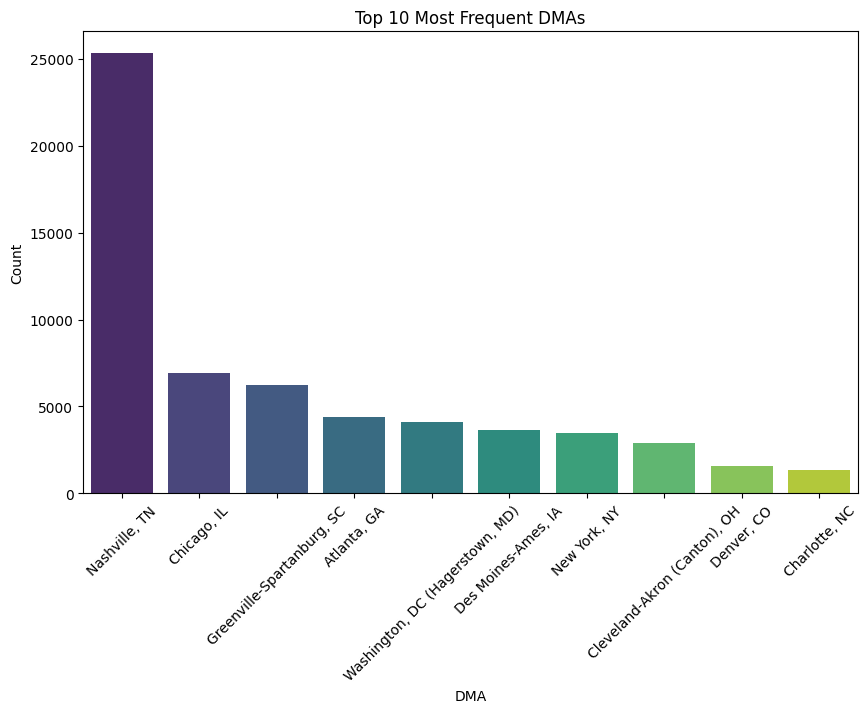

/var/folders/rw/2_yr05hd56b1rkq4976bf6w00000gn/T/ipykernel_36549/3083008071.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dma', data=df_cleaned, palette='magma')


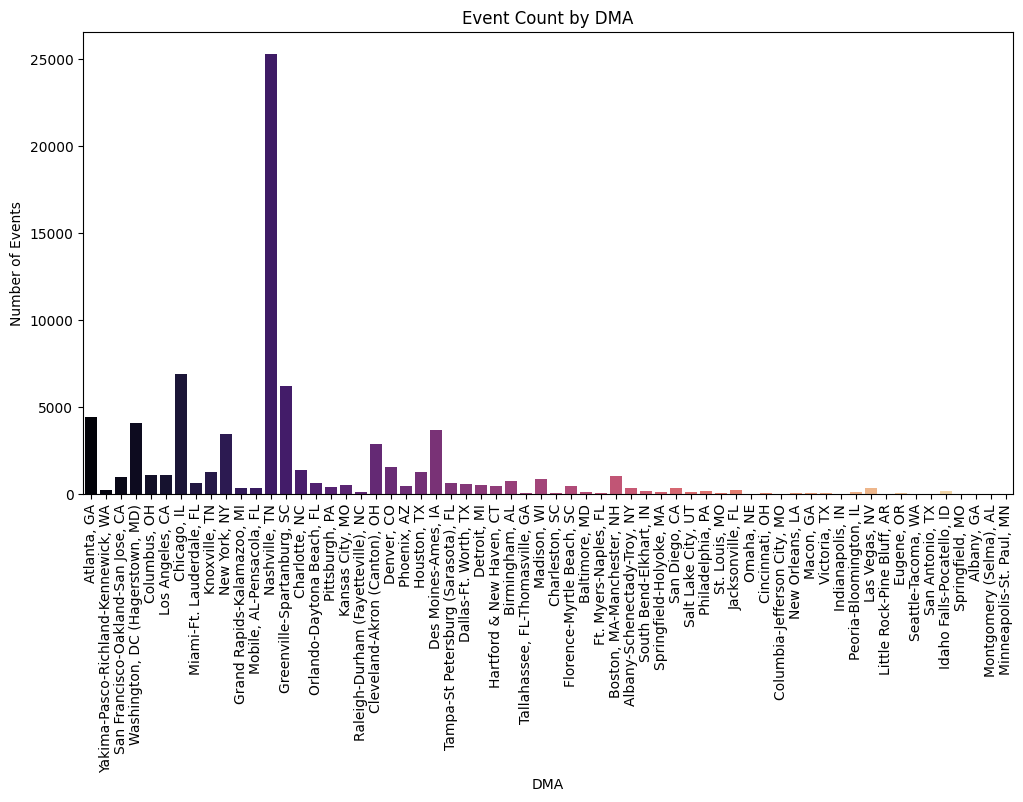

In [13]:
# Check for missing values in the dma column
print(f'Missing values in dma column: {df["dma"].isnull().sum()}')

# Clean the data (remove rows with missing dma values)
df_cleaned = df.dropna(subset=['dma'])

# Unique DMA count and most frequent DMAs
print(f'Number of unique DMAs: {df_cleaned["dma"].nunique()}')
top_dma = df_cleaned['dma'].value_counts().head(10)
print(f'Top 10 most frequent DMAs:\n{top_dma}')

# Plot top 10 most frequent DMAs
plt.figure(figsize=(10, 6))
sns.barplot(x=top_dma.index, y=top_dma.values, palette='viridis')
plt.title('Top 10 Most Frequent DMAs')
plt.xlabel('DMA')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 5. Distribution of events by DMA
plt.figure(figsize=(12, 6))
sns.countplot(x='dma', data=df_cleaned, palette='magma')
plt.title('Event Count by DMA')
plt.xlabel('DMA')
plt.ylabel('Number of Events')
plt.xticks(rotation=90)
plt.show()

### Examining Number of Sessions per User
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

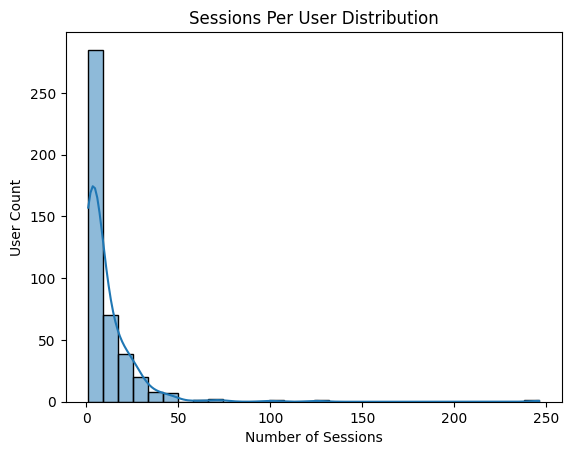

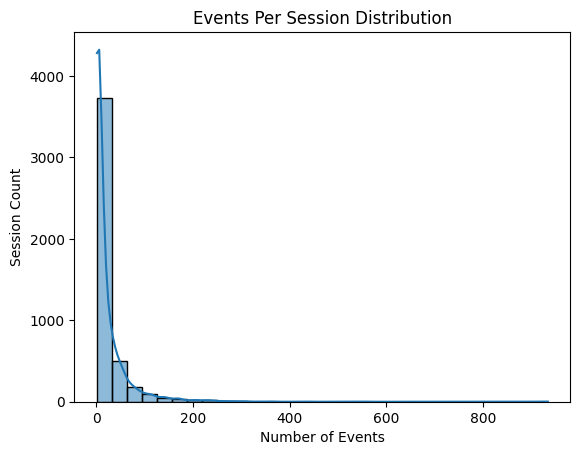

In [14]:
# Convert timestamp columns to datetime objects
df['event_time'] = pd.to_datetime(df['event_time'])
df['client_event_time'] = pd.to_datetime(df['client_event_time'])


# Sessions per user (user_id and session_id)
session_counts = df.groupby('user_id')['session_id'].nunique()
sns.histplot(session_counts, kde=True, bins=30)
plt.title("Sessions Per User Distribution")
plt.xlabel("Number of Sessions")
plt.ylabel("User Count")
plt.show()

# Number of events per session
events_per_session = df.groupby('session_id').size()
sns.histplot(events_per_session, kde=True, bins=30)
plt.title("Events Per Session Distribution")
plt.xlabel("Number of Events")
plt.ylabel("Session Count")
plt.show()

### Examining user_properties (Roles) Column
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

roles
underwriter           92607
admin                  8857
manager                7022
UA                     5078
internal               3026
self-serve             1745
nf-underwriter         1583
FS                     1490
BD                      730
agent                   432
Broker                  415
System Admin            375
integrations-admin      182
Auditor                  26
Broker View-only          7
Blank                     1
Name: count, dtype: int64


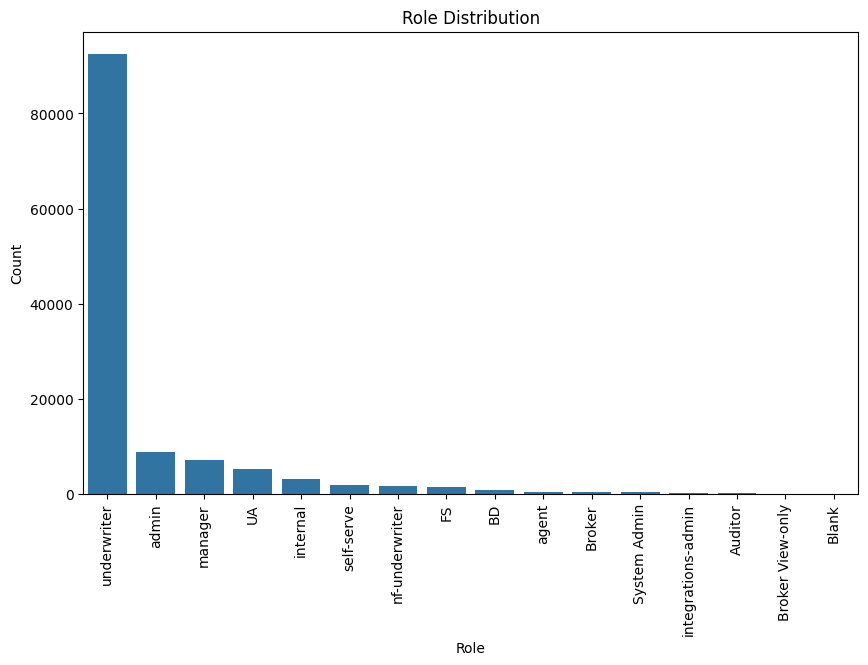

In [15]:
# User properties (roles)

# Convert string representation of lists into actual lists
df['user_properties'] = df['user_properties'].apply(lambda x: ast.literal_eval(x))

# Extract roles from user_properties
df['roles'] = df['user_properties'].apply(lambda x: x.get('roles', []))

# Count the most common roles
roles = df['roles'].explode().value_counts()
print(roles)

# Plot role distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=roles.index, y=roles.values)
plt.title("Role Distribution")
plt.xlabel("Role")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

### Examining User Session Times
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

In [16]:
df.groupby('user_id')['session_id'].nunique().sort_values(ascending=False).head(10)

user_id
0c4896b7-08fa-4cb4-852f-27ad584f0864    246
1b992a40-b2c3-4b69-a5bc-05711eeddd80    125
9cadb195-5205-414d-bac7-3d96d21469a7    100
3b3862f8-a7ac-4b89-9f7b-835903af2a92     73
EMPTY                                    71
5e53fd23-ee05-4d99-88d8-ccd21c308b80     61
13279039-cd19-4db7-9efa-50234c6eaa4f     48
91349869-3223-4a5a-90b7-b87f69f873cc     47
9aecc15d-64a4-4190-80f5-b5b842422f2c     47
87e0e1e4-6ad4-48bb-b458-07c555ded5f1     45
Name: session_id, dtype: int64

### Key Insights regarding User Session Times
The top users have frequent but short sessions, possibly due to multiple log-in  attempts for individual tasks recorded as separate sessions. This is a cause of concern as short sessions could indicate usability issues. If users return often for short periods, they might be:
 - Struggling to complete tasks
 - Refreshing pages frequently due to delays
 - Only using the platform briefly (e.g., quick lookups instead of deep engagement)

### Examining lag on the Server's End

In [17]:
# Convert 'server_received_time' to datetime if it's in string format
df['server_received_time'] = pd.to_datetime(df['server_received_time'], errors='coerce')

df_sessions = df.groupby('session_id')['server_received_time'].agg(['min', 'max'])
df_sessions['session_length'] = (df_sessions['max'] - df_sessions['min']).dt.total_seconds()

df_sessions.groupby(df_sessions.index)['session_length'].mean().sort_values(ascending=True).head(10)

session_id
1724388400544    0.0
1724162434838    0.0
1724162434878    0.0
1724162434879    0.0
1724162434880    0.0
1724162434881    0.0
1724162434882    0.0
1724162412315    0.0
1726738553821    0.0
1724162488984    0.0
Name: session_length, dtype: float64

### Results from above
The platform does not appear to have delays or performance issues. So, users might be interacting in short bursts, completing tasks quickly.

### Examining Server Session Length
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

In [18]:
df_sessions = df.groupby('session_id')['server_received_time'].agg(['min', 'max'])
df_sessions['session_length'] = (df_sessions['max'] - df_sessions['min']).dt.total_seconds()

df = df.merge(df_sessions[['session_length']], left_on='session_id', right_index=True)
print("Average session length (registered users):", df[df['user_id'] != 'EMPTY']['session_length'].mean())
print("Average session length (guest users):", df[df['user_id'] == 'EMPTY']['session_length'].mean())

Average session length (registered users): 9459.935368538307
Average session length (guest users): 2174.3563097897504


In [19]:
df_last_events = df.sort_values(['session_id', 'server_received_time']).groupby('session_id').last()
df_last_events['event_type'].value_counts().head(10)

event_type
session_end                                    2079
account-lines::configurable-table:render        396
dashboard:my-book:configurable-table:render     369
account-lines::widget:render                    300
action-center:::close-click                     166
dashboard:my-book::view                         114
session_start                                   106
account:::view                                  104
application-window-opened                       103
:all-accounts::view                             100
Name: count, dtype: int64

### Key Insights on Server Sessions
- Guest Users Have Shorter Sessions Than Registered Users
- Registered users engage significantly longer than guest users.
- Guest users spend ~75% less time on the platform, which suggests they either lose interest, don’t find what they need, or face friction in deeper engagement.
- Possible friction points for guest users:
- Lack of a clear onboarding process.
- No strong incentive to register and continue using the platform.
- Most users end sessions after UI rendering (widget:render configurable-table:render) rather than after meaningful actions.
- Users might be passively browsing but not deeply interacting.
- Few sessions end with actual engagement actions (e.g., form submissions, button clicks).

### Examining Distribution of Session Events
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

<Axes: title={'center': 'Distribution of Session Event Counts'}, ylabel='Frequency'>

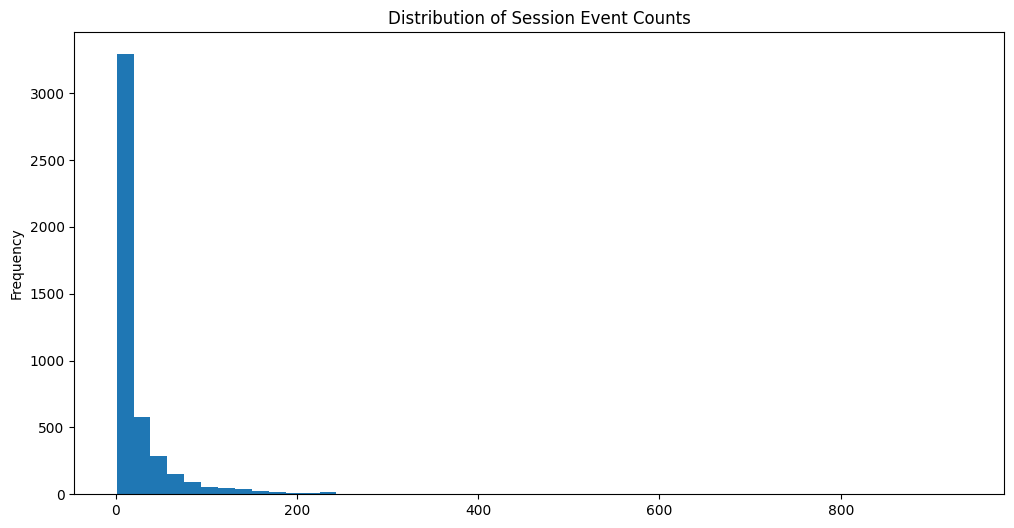

In [20]:
df_sessions = df.groupby('session_id').size()
df_sessions.plot(kind='hist', bins=50, figsize=(12,6), title="Distribution of Session Event Counts")

In [21]:
df_sessions = df.groupby('session_id').size()  

df_low_activity = df[df['session_id'].isin(df_sessions[df_sessions <= 5].index)]
df_low_activity['event_type'].value_counts().head(10)

event_type
session_end                           2023
session_start                         1266
application-window-opened              207
dashboard:my-book::view                 98
account-lines:::view                    55
action-center:::view                    52
action-center:action-details::view      51
:all-accounts::view                     51
account:::view                          51
::nav-header:action-center-click        42
Name: count, dtype: int64

### Key Insights on Distribution of Session Events
- Many users drop off immediately after opening a session ie. a user will start a session, view a page, and leave within 5 events
- Most sessions involve views (::view), but not interactions like button clicks  or form submissions. This suggests low engagement beyond page navigation.

### Examining Number of Events Received per Hour
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

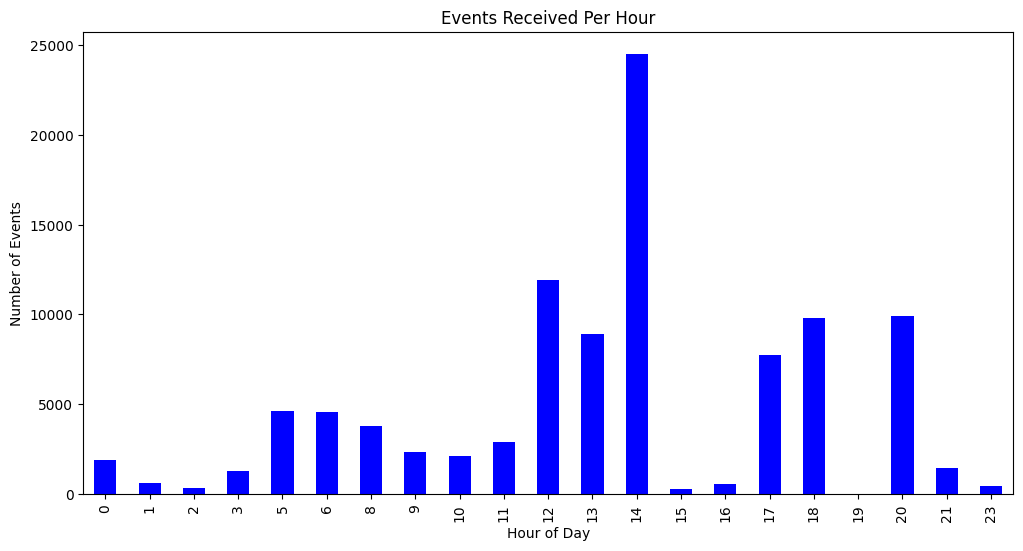

In [22]:
df['hour_received'] = df['server_received_time'].dt.hour
df['hour_received'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='blue')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Events")
plt.title("Events Received Per Hour")
plt.show()

### Key Insights on the number of Session Events per Hour
- Peak activity around 13:00 (1 PM) suggests midday engagement is strongest.
- Users might be checking policies, updating data, or making key decisions.
- The platform has distinct off-hours (3 - 4 PM, after 9 PM), where engagement is low.
Morning and evening spikes indicate secondary engagement periods.

##### Morning and Evening Users Are Mostly Browsing, Not Engaging
The high number of widget:render and view events suggests they are checking data rather than making changes.
Possible passive usage before or after core work hours.

##### Midday Peak Is the Most Important for Engagement
More submissions, updates, and meaningful interactions.
Platform performance should be optimized for these peak hours to ensure smooth user experience.

##### Evening Users May Need Engagement Nudges
Since most evening users are just browsing without submitting or interacting, engagement nudges (e.g., pop-ups, CTAs) could encourage deeper interactions.

### Examining Number of Events Received per Day of the Week
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

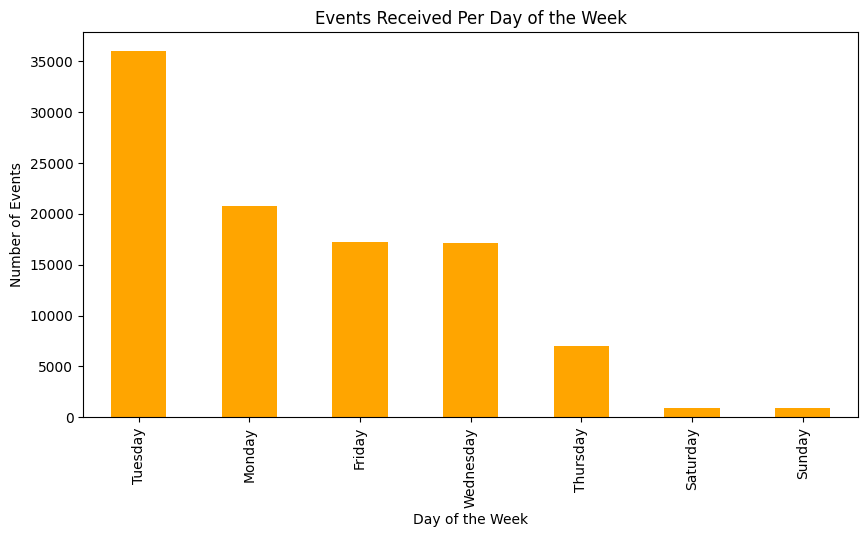

In [23]:
df['weekday_received'] = df['server_received_time'].dt.day_name()

df['weekday_received'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Events")
plt.title("Events Received Per Day of the Week")
plt.show()

### Key Insights on the number of Session Events per Day of the Week
- Tuesday is the key engagement day, so any important updates, marketing efforts, or feature rollouts should be timed around Tuesday.
- Midweek activity is stronger than late-week, meaning users are more active early in their workweek.
- Low weekend engagement confirms that most users use the platform only during work hours.

### Examining Type of Interactions on Tuesdays (key engagement day as found above)
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

In [24]:
df_tuesday = df[df['weekday_received'] == 'Tuesday']
df_tuesday['event_type'].value_counts().head(10)

event_type
account-lines::widget:render                   7795
account-lines::configurable-table:render       3833
dashboard:my-book:widget:render                2295
dashboard:my-book:configurable-table:render    2143
account-lines:::view                           2062
account-lines::layout:render                   1934
account:::view                                 1382
application-window-opened                      1104
dashboard:my-book::view                         876
:all-accounts:configurable-table:render         824
Name: count, dtype: int64

### Key Insights on the number of Session Events per Day of the Week
- Given Tuesday is the busiest day, the type of interactions that are mostly used are for passive interactions (UI rendering, page views).
- This may be due to the fact that users may be checking data but not actively submitting policies or making decisions.
- Engagement nudges might be needed to push users toward actual actions.

### Examining Average Session Length by Hour
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

In [25]:
df_sessions = df.groupby('session_id')['server_received_time'].agg(['min', 'max'])
df_sessions['session_length'] = (df_sessions['max'] - df_sessions['min']).dt.total_seconds()

df_sessions = df_sessions[['session_length']]
df_sessions = df_sessions.reset_index()  

In [26]:
df_merged = df.merge(df_sessions[['session_id', 'session_length']], on='session_id', how='left')

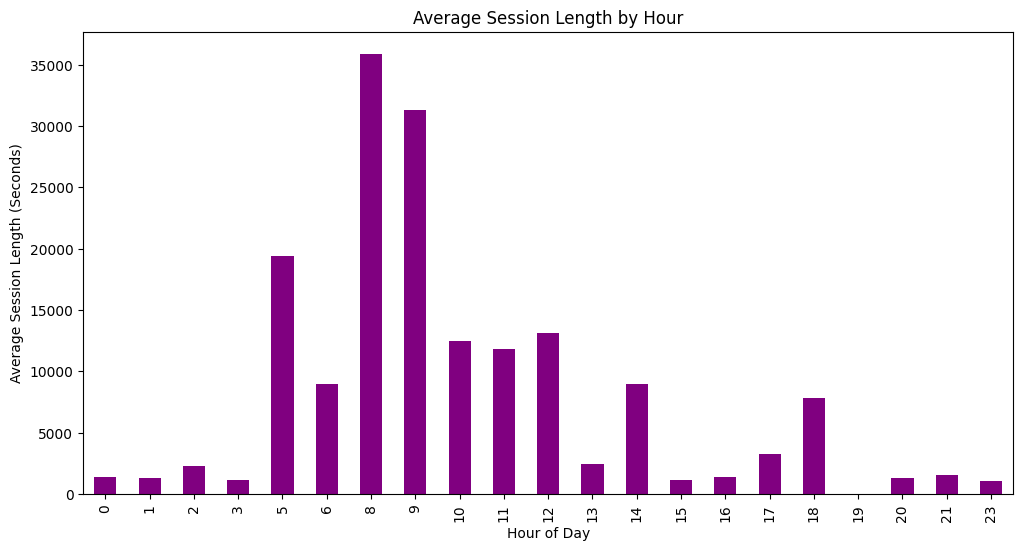

In [27]:
df_merged.groupby(df_merged['server_received_time'].dt.hour)['session_length_y'].mean().plot(kind='bar', figsize=(12,6), color='purple')
plt.xlabel("Hour of Day")
plt.ylabel("Average Session Length (Seconds)")
plt.title("Average Session Length by Hour")
plt.show()

### Key Insights on the Average Session Length by Hour
- Morning users tend to stay logged in for long durations (~6 AM - 10 AM)
- Might indicate a need for automatic session timeouts if engagement isn't continuous.
- Afternoon users have shorter sessions, suggesting structured work patterns. Users may be logging in for specific tasks and leaving.
- Evening sessions are the shortest, meaning fewer users engage deeply outside of work hours.
- Therefore, this suggests the platform is primarily work-related and not used casually in the evening.

### Examining Number of Events and Session Length
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

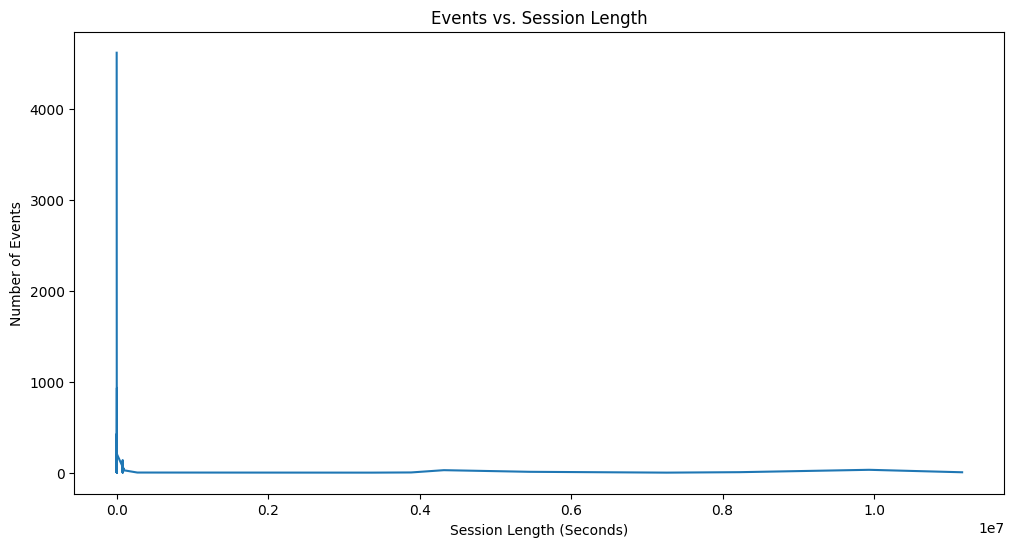

In [28]:
df_merged.groupby('session_length_y')['event_type'].count().sort_index().plot(kind='line', figsize=(12,6))
plt.xlabel("Session Length (Seconds)")
plt.ylabel("Number of Events")
plt.title("Events vs. Session Length")
plt.show()

### Examining the Frequency of Different Events in Short and Long Sessions
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

In [29]:
short_sessions = df_merged[df_merged['session_length_y'] <= 600]  # 10 min or less
long_sessions = df_merged[df_merged['session_length_y'] >= 10800] # 3+ hours

print("Top events in short sessions:")
print(short_sessions['event_type'].value_counts().head(10))

print("\nTop events in long sessions:")
print(long_sessions['event_type'].value_counts().head(10))

Top events in short sessions:
event_type
account-lines::widget:render                   4678
dashboard:my-book:widget:render                2238
account-lines::configurable-table:render       2143
dashboard:my-book:configurable-table:render    2094
session_end                                    1967
session_start                                  1879
account-lines:::view                           1387
application-window-opened                      1270
account-lines::layout:render                   1190
dashboard:my-book::view                         920
Name: count, dtype: int64

Top events in long sessions:
event_type
session_end                                 114
account-lines::widget:render                 87
account-lines::configurable-table:render     54
account-lines::layout:render                 24
account-lines:::view                         24
:all-accounts:configurable-table:render      17
:all-accounts:widget:render                  16
:all-accounts:layout:render         

### Key Insights on Top Events in Short and Long Sessions
- Short Sessions Are Dominated by UI Rendering & Navigation with users mostly loading UI components and then leaving
- There is no sign of meaningful engagement (e.g., form submissions, clicks, policy updates). This is a result of users browsing and not taking actions that drive business impact
- Long Sessions Also Lack Strong Interaction Events
- Users with longer sessions seem to spend their time mostly navigating and viewing, rather than interacting deeply.

Possible causes:
- Users leave tabs open for long periods but aren’t actively working.
- The platform requires lots of browsing to complete tasks, leading to inefficient workflows.
- Some users might be reviewing information for long periods rather than actively taking actions.

## Overall Conclusions from server_received_time Analysis
Most sessions are extremely short (between 0 and 0.1 seconds).

Many users leave immediately after logging in or sessions are being created but not actively used.
This suggests possible session timeout issues, accidental logins, or bot activity triggering sessions that don’t perform meaningful events.
Short sessions are dominated by UI rendering and navigation events.

The most common events in short sessions are widget:render, configurable-table:render, and view events.
The presence of session_start and session_end in the top events suggests that many users log in, load a few UI components, and then leave.
Users might be browsing but not taking actions that drive business impact.
Long sessions also lack strong interaction events.

Even in long sessions, the most common events are still session_end, widget:render, and view events.
Users appear to stay logged in but don’t frequently perform meaningful engagement actions such as submit-click, form-submit, or quote-request.
This could mean users leave tabs open for extended periods or that platform workflows require excessive browsing before completing a task.
Session durations vary significantly based on the time of day.

The longest sessions occur in the morning (6 AM - 10 AM), with peak session length around 8 AM - 9 AM (~9.7 hours on average).
Afternoon sessions (12 PM - 4 PM) are shorter, suggesting more structured and task-oriented usage.
Evening sessions (7 PM - 11 PM) are the shortest, indicating lower engagement outside of work hours.
Engagement on the platform is highly uneven.

Users who stay longer do not necessarily engage more deeply.
Many users only browse or navigate without taking meaningful actions.
The platform’s high engagement spikes are primarily UI-related rather than being driven by core business interactions.
Certain hours of the day contribute disproportionately to session length.

The largest spikes in session length occur in the early morning.
This suggests a mix of either power users working in long sessions or users who keep sessions open without interacting.
There is a sharp drop-off in session length in the afternoon, followed by minimal evening engagement.
Session behavior patterns indicate potential areas for optimization.

The platform might benefit from session timeout policies if long sessions are due to inactivity.
Engagement nudges should be introduced to convert passive browsing into meaningful interactions.
Workflows should be streamlined to reduce excessive navigation and UI rendering before completing key tasks.


### Examining the Processing Delays on the Server Side
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

In [30]:
df['server_upload_time'] = pd.to_datetime(df['server_upload_time'], errors='coerce')
df['server_received_time'] = pd.to_datetime(df['server_received_time'], errors='coerce')

df['processing_delay'] = (df['server_upload_time'] - df['server_received_time']).dt.total_seconds()

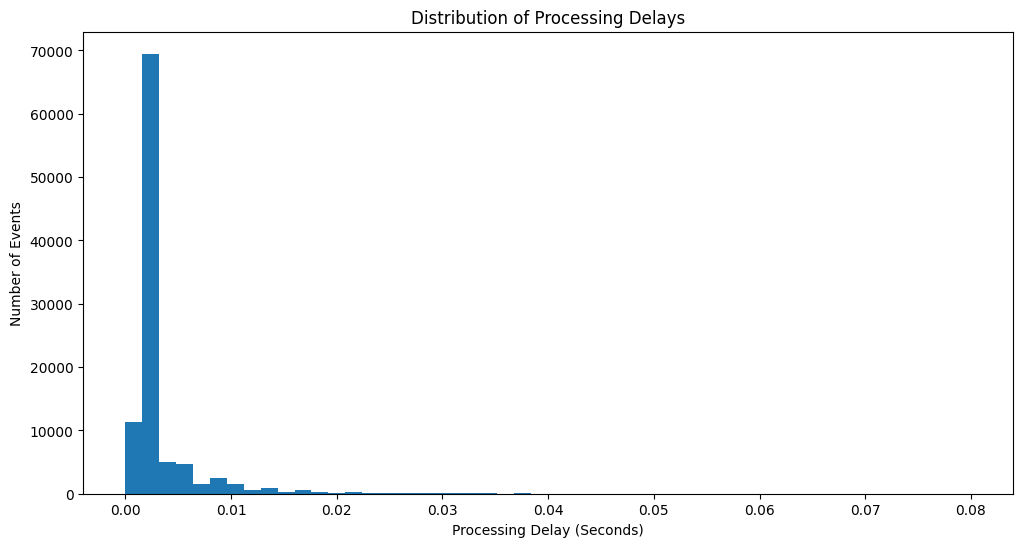

In [31]:
df['processing_delay'].plot(kind='hist', bins=50, figsize=(12,6))
plt.xlabel("Processing Delay (Seconds)")
plt.ylabel("Number of Events")
plt.title("Distribution of Processing Delays")
plt.show()

### Key Insights on Top Events in Short and Long Sessions
- The system processes most events efficiently, with negligible latency
- Only a small fraction of events experience delays, but they remain relatively short
- There is no widespread backlog of delayed events, indicating a well-optimized backend

### Examining the Average Processing Delay per Hour
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

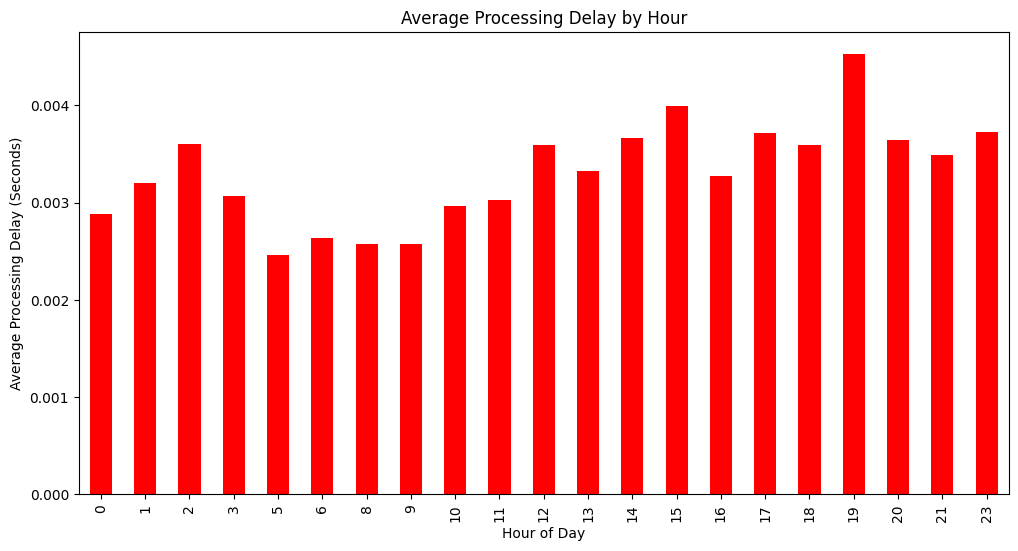

In [32]:
df.groupby(df['server_received_time'].dt.hour)['processing_delay'].mean().plot(kind='bar', figsize=(12,6), color='red')
plt.xlabel("Hour of Day")
plt.ylabel("Average Processing Delay (Seconds)")
plt.title("Average Processing Delay by Hour")
plt.show()

In [33]:
df.groupby('event_type')['processing_delay'].mean().sort_values(ascending=False).head(10)

event_type
rule:::view                                                             0.020000
rule::configurable-table:render                                         0.020000
submissions:all-account:configurable-table:render                       0.017000
account-property-rating:perils:perils-table:delete-click                0.009400
goals-and-rules:goal-definition::view                                   0.008571
goals-and-rules:rules:configurable-table:render                         0.007632
submissions:triaged_submissions-definition:configurable-table:render    0.007300
submissions:triaged_submissions-definition:widget:render                0.007125
goals-and-rules:rules::view                                             0.006750
submissions:triaged_submissions-definition:layout:render                0.006500
Name: processing_delay, dtype: float64

### Key Insights on Top Events in Short and Long Sessions
- The platform’s backend is well-optimized, and no major performance issues exist
- There is no need for immediate processing optimizations, as delays are too small to impact user experience
- Even at peak hours, delays are minimal, meaning the system handles concurrent requests efficiently
- There are no significant performance concerns, as all delays are under 20ms.
- Slightly higher delays in rule-based and submission-related actions could indicate slightly heavier data processing, but nothing alarming.
- Rendering delays in configurable tables suggest that certain UI elements require extra backend work

### Examining the Average Processing Delay per Event Type
Specifically examining amplitude_export_chunk_1_anonymized_subchunk_0_100000.csv as found in 1_csv folder.

In [34]:
threshold = df['processing_delay'].quantile(0.95)  # 95th percentile
df_outliers = df[df['processing_delay'] > threshold]

print("Number of extreme delays:", len(df_outliers))
print("Max processing delay:", df['processing_delay'].max())
df_outliers[['event_type', 'processing_delay']].head(10)

Number of extreme delays: 4603
Max processing delay: 0.08


,event_type,processing_delay
115,application-window-opened,0.013
116,account-policy-rating:::view,0.013
131,account-lines:::change-rating-click,0.018
132,account-lines:::view,0.018
155,::configurable-table:render,0.018
178,::configurable-table:render,0.018
199,::nav-header:user-signed-out,0.013
200,::nav-header:user-signed-out,0.017
222,dashboard:my-book:configurable-table:render,0.013
330,dashboard:my-book:recent-actions-table:account...,0.011


### Key Insights on Top Events in Short and Long Sessions
- Even the slowest events have delays that are too small to impact user experience (~80ms max).
- UI-based operations (rendering, viewing, navigation) have slightly higher delays, but this is expected for actions that involve retrieving or saving UI state.
- No major bottlenecks or system-wide slowdowns are present—the backend performs efficiently.

## Overall conclusion from server_upload_time analysis

The platform's backend is highly efficient, with most events processed instantly (~0 sec delay) and even the slowest events completing within 80ms. UI-related actions (table renders, navigation, user sign-outs) have slightly longer delays (~10-20ms), but these are negligible and do not impact user experience. No significant bottlenecks or system-wide slowdowns were found, indicating that backend performance is well-optimized.

# Exploratory Data Analysis (EDA) & Insights on All .csv Files
### Combining all .csv files from 1_csv folder into 2024combined_file.csv and all .csv files from 2025_csv folder into 2025combined_file.csv
Now examining all data from the 1_csv folder and the 2024_csv folder

In [35]:
## Combining all 2024 csv files into 1
csv_files1 = glob.glob('1_csv/*.csv')

# Read and combine all 2024 csv files
combined_df = pd.concat([pd.read_csv(file) for file in csv_files1], ignore_index=True)

# Save the combined df to a new csv file
combined_df.to_csv('2024combined_file.csv', index=False)


## Combining all 2025 csv files into 1
csv_files2 = glob.glob('2025_csv/*.csv')

# Read and combine all 2024 csv files
combined_df = pd.concat([pd.read_csv(file) for file in csv_files2], ignore_index=True)

# Save the combined df to a new csv file
combined_df.to_csv('2025combined_file.csv', index=False)

/var/folders/rw/2_yr05hd56b1rkq4976bf6w00000gn/T/ipykernel_36549/1473981201.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.concat([pd.read_csv(file) for file in csv_files1], ignore_index=True)


In [36]:
# Examining 2024combined_csv
PATH = '2024combined_file.csv'
combined_df_2024 = pd.read_csv(PATH)
combined_df_2024.head()


,$insert_id,amplitude_id,app,city,client_event_time,client_upload_time,country,data,data_type,device_family,...,os_version,platform,processed_time,region,server_received_time,server_upload_time,session_id,user_id,user_properties,uuid
0,ccb04252-a1ce-408a-b1a2-a3573ea4917d,864218414211,591532,Spring,2024-06-17 20:33:48.109000,2024-06-17 20:33:49.713000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Mac OS X,...,119,Web,2024-06-17 20:33:49.895000,Texas,2024-06-17 20:33:49.713000,2024-06-17 20:33:49.717000,1718650922298,2db3ef42-46f0-4856-a55d-b202565c7090,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",a4e18a7c-e721-407a-a507-4c0eaf4f45d4
1,b8759f20-fec3-4387-a4e2-00f82925115c,864218414211,591532,Spring,2024-06-17 20:33:48.111000,2024-06-17 20:33:49.713000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Mac OS X,...,119,Web,2024-06-17 20:33:49.895000,Texas,2024-06-17 20:33:49.713000,2024-06-17 20:33:49.717000,1718650922298,2db3ef42-46f0-4856-a55d-b202565c7090,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",8276821f-ade8-46a3-9496-5e4fd10c3aa5
2,b8c5ccb7-c60b-41fa-9319-ef980bc10975,864218414211,591532,Spring,2024-06-17 20:33:50.024000,2024-06-17 20:33:51.100000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Mac OS X,...,119,Web,2024-06-17 20:33:51.438000,Texas,2024-06-17 20:33:51.100000,2024-06-17 20:33:51.103000,1718650922298,2db3ef42-46f0-4856-a55d-b202565c7090,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",186d75e3-67c3-4806-96c9-17e73267fed4
3,6b6b6eb6-b80b-4549-8d68-d61d8850a10f,864218414211,591532,Spring,2024-06-17 20:34:01.488000,2024-06-17 20:34:02.649000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Mac OS X,...,119,Web,2024-06-17 20:34:03.105000,Texas,2024-06-17 20:34:02.649000,2024-06-17 20:34:02.652000,1718650922298,2db3ef42-46f0-4856-a55d-b202565c7090,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",872efa1a-62c2-4c0a-9b0a-ce7dcc68d63d
4,aa09273f-2938-44fd-ac62-40cfcbd2d130,864218414211,591532,Spring,2024-06-17 20:34:02.393000,2024-06-17 20:34:07.056000,United States,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Mac OS X,...,119,Web,2024-06-17 20:34:08.587000,Texas,2024-06-17 20:34:07.056000,2024-06-17 20:34:07.059000,1718650922298,2db3ef42-46f0-4856-a55d-b202565c7090,"{'initial_utm_medium': 'EMPTY', 'initial_refer...",89e42a4c-f557-40a4-84eb-e21687be83de


In [37]:
# Examining 2025combined_csv
PATH = '2025combined_file.csv'
combined_df_2025 = pd.read_csv(PATH)
combined_df_2025.head()

,$insert_id,amplitude_id,app,city,client_event_time,client_upload_time,country,data,data_type,device_family,...,os_version,platform,processed_time,region,server_received_time,server_upload_time,session_id,user_id,user_properties,uuid
0,538ab3f8-09df-4750-90e0-abe8ad8f6a0c,857540493886,591532,Mumbai,2025-01-16 13:28:02.427000,2025-01-16 13:28:04.133000,India,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,131,Web,2025-01-16 13:28:06.277000,Maharashtra,2025-01-16 13:28:04.133000,2025-01-16 13:28:04.135000,1737021244277,0c4896b7-08fa-4cb4-852f-27ad584f0864,"{'businessUnit': [], 'roles': ['underwriter'],...",006cfd50-7f9e-4ffa-85e8-720404db8247
1,2d9442b9-a8fe-442a-9761-f63fe0171ac5,857540493886,591532,Mumbai,2025-01-16 13:28:02.433000,2025-01-16 13:28:04.133000,India,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,131,Web,2025-01-16 13:28:06.277000,Maharashtra,2025-01-16 13:28:04.133000,2025-01-16 13:28:04.135000,1737021244277,0c4896b7-08fa-4cb4-852f-27ad584f0864,"{'businessUnit': [], 'roles': ['underwriter'],...",d2b7af18-79b3-4a7f-bf53-022122fea198
2,b39d7ac2-76af-48a6-a367-9e0050359961,857540493886,591532,Mumbai,2025-01-16 13:28:04.229000,2025-01-16 13:28:06.099000,India,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,131,Web,2025-01-16 13:28:08.007000,Maharashtra,2025-01-16 13:28:06.099000,2025-01-16 13:28:06.101000,1737021244277,0c4896b7-08fa-4cb4-852f-27ad584f0864,"{'businessUnit': [], 'roles': ['underwriter'],...",287c085d-27a6-4698-be52-acb0256b8e83
3,57a434dd-d570-4ba2-a77c-de2a4f6be9cf,857540493886,591532,Mumbai,2025-01-16 13:28:04.263000,2025-01-16 13:28:06.099000,India,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,131,Web,2025-01-16 13:28:08.007000,Maharashtra,2025-01-16 13:28:06.099000,2025-01-16 13:28:06.101000,1737021244277,0c4896b7-08fa-4cb4-852f-27ad584f0864,"{'businessUnit': [], 'roles': ['underwriter'],...",cb5b363f-e831-432b-b8d5-272e4219e546
4,fa8af5ee-f45f-4d1a-b1e6-5ea7d293a628,857540493886,591532,Mumbai,2025-01-16 13:28:04.268000,2025-01-16 13:28:06.099000,India,"{'path': '/2/httpapi', 'group_first_event': {}...",event,Windows,...,131,Web,2025-01-16 13:28:08.007000,Maharashtra,2025-01-16 13:28:06.099000,2025-01-16 13:28:06.101000,1737021244277,0c4896b7-08fa-4cb4-852f-27ad584f0864,"{'businessUnit': [], 'roles': ['underwriter'],...",e4254b14-8af1-4e71-ba6a-085992467fa5


### Examining the Countries with a Greater than 10 days Upload Time (client upload time)

Specifically examining 2024combined_file.csv

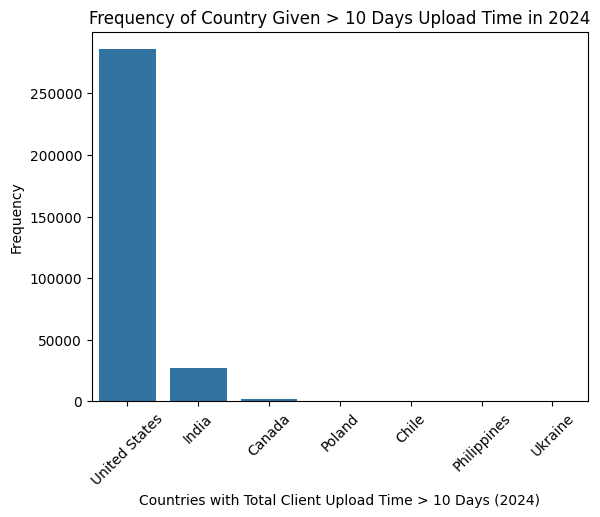

In [38]:
combined_df_2024['client_event_time'] = pd.to_datetime(combined_df_2024['client_event_time'])
combined_df_2024['client_upload_time'] = pd.to_datetime(combined_df_2024['client_upload_time'])
combined_df_2024['time_difference'] = combined_df_2024['client_upload_time'] - combined_df_2024['client_event_time']
combined_df_2024['time_difference_minutes'] = combined_df_2024['time_difference'].dt.total_seconds() / 60

combined_df_2024['time_difference_minutes'].describe()

##

# Exploring those with upload times greater than 10 days (input in minutes)
filtered_df_2024 = combined_df_2024[combined_df_2024['time_difference_minutes'] > 14400]
filtered_df_2024.describe(include='all')

sns.countplot(x='country', data=filtered_df_2024)
plt.xlabel('Countries with Total Client Upload Time > 10 Days (2024)')
plt.ylabel('Frequency')
plt.title('Frequency of Country Given > 10 Days Upload Time in 2024')

# Rotate x-axis labels if they are crowded
plt.xticks(rotation=45)

plt.show()

Specifically examining 2025combined_file.csv

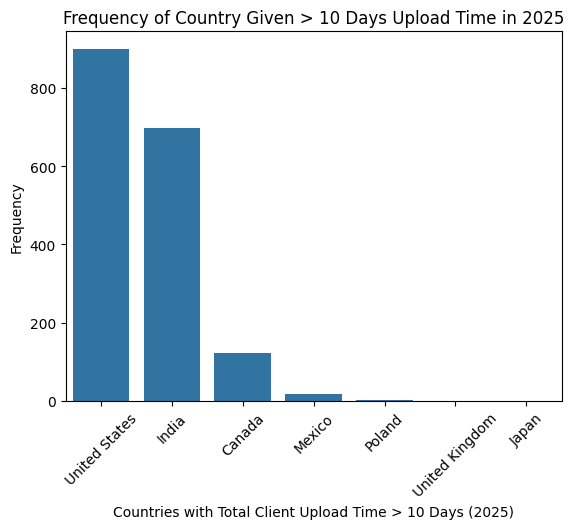

In [39]:
combined_df_2025['client_event_time'] = pd.to_datetime(combined_df_2025['client_event_time'])
combined_df_2025['client_upload_time'] = pd.to_datetime(combined_df_2025['client_upload_time'])
combined_df_2025['time_difference'] = combined_df_2025['client_upload_time'] - combined_df_2025['client_event_time']
combined_df_2025['time_difference_minutes'] = combined_df_2025['time_difference'].dt.total_seconds() / 60

combined_df_2025['time_difference_minutes'].describe()

##

# Exploring those with upload times greater than 10 days (input in minutes)
filtered_df_2025 = combined_df_2025[combined_df_2025['time_difference_minutes'] > 14400]
filtered_df_2025.describe(include='all')

sns.countplot(x='country', data=filtered_df_2025)
plt.xlabel('Countries with Total Client Upload Time > 10 Days (2025)')
plt.ylabel('Frequency')
plt.title('Frequency of Country Given > 10 Days Upload Time in 2025')

# Rotate x-axis labels if they are crowded
plt.xticks(rotation=45)

plt.show()

### Key Insights on the frequency of Country given a greater than 10 days client upload time (2024 vs. 2025)
- A significant drop in metrics on the y-axis due to less data found in 2025
- In 2025, there is more variety in the countries with a greater than 10 days client upload time compared to 2024
- The same countries displayed in both 2024 and 2025 were:
    - United States
    - India
    - Canada
    - Poland 

# Exploratory Data Analysis (EDA) & Insights on Drop-off Points
### Will examine by determining the users who had less events in 2025 compared to 2024

1. To ensure an appropriate timeline, I examined the 2025 dataset and discovered the client_event_time were collected over 207 days. I shortened the 2024 dataset starting from the earliest client_event_time (April 14, 2024) and filtered the data to span over 207 days from that earliest point.

2. I created a list of unique user_ids from the filtered 2024 data set that spans over 207 days, and iterated through that list. During each iteration, I went through the combined 2024 dataset to count the number of times that user_id popped up, and did the same for the 2025 dataset. Those user_ids who showed up less in 2025 compared to 2024, indicates a lower retention rate, as those users are using the platform less than previously.

3. To take out any minimal differences, I filtered the data so that the difference of the number of events from 2024 and 2025 were greater than 50. I also created a new column to display that difference. Several key users are those with significant drop in events, and those users who have 0 events in 2025, as they stopped using the platform (drop-off points).


In [40]:
# since the 2025 data set is over 207 days, I will shorten the 2024 data set to be
##      over 207 days as well, starting from the earliest time
combined_df_2024['client_event_time'] = pd.to_datetime(combined_df_2024['client_event_time'])
start_date = '2024-04-14'
end_date = '2024-11-07'

filtered_df_2024 = combined_df_2024[(combined_df_2024['client_event_time'] >= start_date) & (combined_df_2024['client_event_time'] <= end_date)]

# prints all possible unique user_ids from 2024 dataset over 207 days
users_id_list = filtered_df_2024['user_id'].unique()

# Dictionary to store user_id and row counts for each year
user_row_count = {}

# Iterate over each user_id
for user_id in users_id_list:
    # Get the count of rows for the user_id in filtered_df_2024 and filtered_df_2025
    count_2024 = filtered_df_2024[filtered_df_2024['user_id'] == user_id].shape[0]
    count_2025 = combined_df_2025[combined_df_2025['user_id'] == user_id].shape[0]
    
    # Store the row counts
    user_row_count[user_id] = {'user_id': user_id, '2024': count_2024, '2025': count_2025}

# Convert the dictionary to a DataFrame for easier comparison
row_count_df = pd.DataFrame.from_dict(user_row_count, orient='index')

# Filter out users where the number of rows decreased from 2024 to 2025
filtered_users = row_count_df[(row_count_df['2025'] + 50) <= row_count_df['2024']]
userids_dropoffs = filtered_users['user_id'].unique()

# Create a new column to show the difference between 2024 and 2025
filtered_users['difference'] = row_count_df['2024'] - row_count_df['2025']

In [ ]:
print(filtered_users)

                                                                   user_id  \
125c9087-fbca-4778-a86e-d03332c127fc  125c9087-fbca-4778-a86e-d03332c127fc   
61a2808e-1f12-4e32-b1be-7a62225ade2f  61a2808e-1f12-4e32-b1be-7a62225ade2f   
871ee2be-7f0a-474b-9e33-cc29a4889121  871ee2be-7f0a-474b-9e33-cc29a4889121   
1b98c6bb-b6b9-4b9a-a62f-6a31fb18ada4  1b98c6bb-b6b9-4b9a-a62f-6a31fb18ada4   
a3a47efd-4443-45b2-ae6e-85756b563898  a3a47efd-4443-45b2-ae6e-85756b563898   
...                                                                    ...   
0fa9ac2a-c33f-492c-ba5b-8b4933fc1006  0fa9ac2a-c33f-492c-ba5b-8b4933fc1006   
d01e89e5-f6b1-4737-bee0-eafd00679b82  d01e89e5-f6b1-4737-bee0-eafd00679b82   
d7088c42-2c28-d1d4-f0c7-352e7b8611ec  d7088c42-2c28-d1d4-f0c7-352e7b8611ec   
1adda23e-0432-434f-9a66-994feceae381  1adda23e-0432-434f-9a66-994feceae381   
bc372c02-8133-467c-8964-6ea649cd5ca5  bc372c02-8133-467c-8964-6ea649cd5ca5   

                                      2024  2025  difference  


## Examining drop-off points
Examining one user_id = '61a2808e-1f12-4e32-b1be-7a62225ade2f' where there is a significant drop in the amount of activity, from 5841 events in 2024 to 0 in 2025.

After examining several columns, the user_id added the business unit: 'UA Pool' halfway through. As well, there were more uses of session_end event as time went on. The uses of session_end were 0 in the months April-June 2024, and gradually increased each month afterwards. Due to an increase in session_end events, the duration between client_event_time and client_upload_time have a significant spike between any other events. Thus, I can infer that as the user began to make use of session_end more often, they realized the loading time was much longer than the usualy events with faster times.

As a result, the user stopped using Federato's platform and cannot be found in the 2025 dataset.

In [ ]:
# Dictionary to store user_id
dropoff_users_df_2024 = filtered_df_2024[filtered_df_2024['user_id'].isin(userids_dropoffs)]
dropoff_users_df_2025 = combined_df_2025[combined_df_2025['user_id'].isin(userids_dropoffs)]

# Investigate user_id = f9663192-75be-44a6-ad1a-bf4db4a77074
user_2024 = dropoff_users_df_2024[dropoff_users_df_2024['user_id'] == '61a2808e-1f12-4e32-b1be-7a62225ade2f']
user_2025 = dropoff_users_df_2025[dropoff_users_df_2025['user_id'] == '61a2808e-1f12-4e32-b1be-7a62225ade2f']

## Stickiness over a 28-day period
To measure stickiness, we must determine the time spent per day on the Federato platforn across all sessions over a 28-day period. Using the dates on client_event_time, the earliest date is April 14, 2024, and the latest is January 28, 2025. Which in total displays 10 28-day periods.

I will examine the first 28-day period: April 14, 2024 - May 12, 2024

In [ ]:
start_date = pd.to_datetime('2024-04-14')
end_date = pd.to_datetime('2024-05-12')

first_period_2024 = combined_df_2024[(combined_df_2024['client_event_time'] >= start_date) & (combined_df_2024['client_event_time'] <= end_date)]

# Number of users in first period
first_period_2024['user_id'].nunique() # 456 users




# Initialize an empty list to store the total time spent per day
total_time_spent_per_day = []

# Loop over each day in the date range (28 days)
for i in range(28):
    # Filter the DataFrame for the current date
    filtered_data = combined_df_2024[(combined_df_2024['client_event_time'].dt.date >= start_date.date()) & 
                                     (combined_df_2024['client_event_time'].dt.date < (start_date + pd.Timedelta(days=1)).date())]
    
    # Sum the 'total_time_spent_minutes' for that date
    total_time = filtered_data['time_difference_minutes'].sum()
    
    # Append the total time spent to the list
    total_time_spent_per_day.append(total_time)
    
    # Increment the date by 1 day for the next iteration
    start_date += pd.Timedelta(days=1)
    
# Print the results
for date, time_spent in zip(pd.date_range(start=start_date, end=end_date), total_time_spent_per_day):
    print(f"Date: {date.date()}, Total Time Spent: {time_spent} minutes")

print(total_time_spent_per_day)

Date: 2024-05-12, Total Time Spent: 4.011516666666666 minutes
[np.float64(4.011516666666666), np.float64(0.23516666666666666), np.float64(0.2913), np.float64(1.4894333333333334), np.float64(7.33135), np.float64(0.0), np.float64(1.4895666666666667), np.float64(0.0), np.float64(-4.92413333333333), np.float64(8896294.647550002), np.float64(4.92765), np.float64(7.886000000000003), np.float64(6.5043500000000005), np.float64(897.3173166666666), np.float64(2.96475), np.float64(992.0177500000001), np.float64(23.148699999999998), np.float64(0.0), np.float64(0.0), np.float64(-7.3694500000000005), np.float64(2.750166666666667), np.float64(1.7894166666666667), np.float64(36.04528333333333), np.float64(124.08306666666664), np.float64(0.0), np.float64(2.896216666666666), np.float64(4425.6402333333335), np.float64(8.345133333333333)]


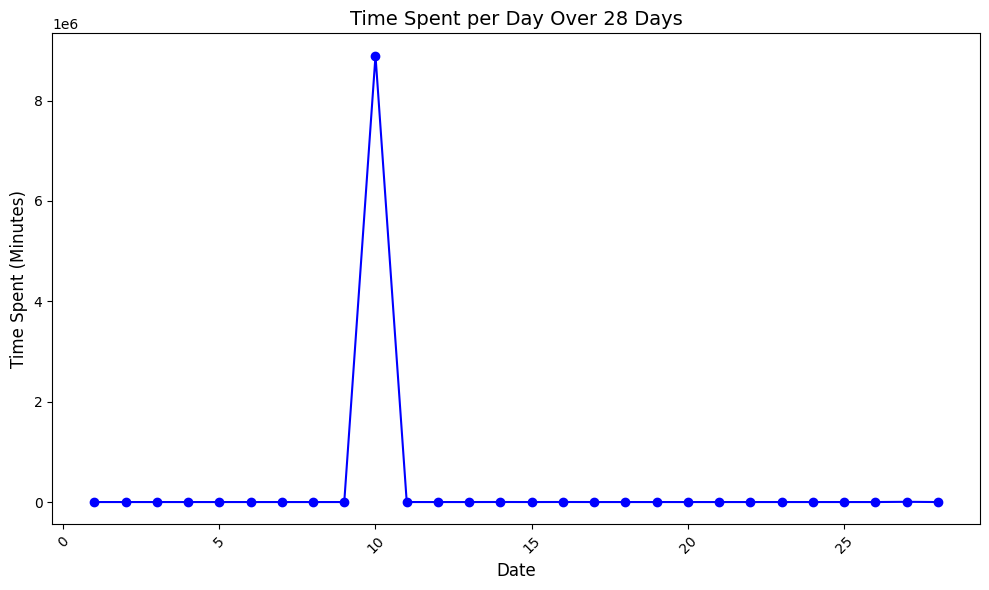

In [ ]:
## Plotting
# Plot the time spent per day over the 28-day period
plt.figure(figsize=(10, 6))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], total_time_spent_per_day, marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Time Spent per Day Over 28 Days', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Time Spent (Minutes)', fontsize=12)

# Formatting the x-axis for better readability (showing date as YYYY-MM-DD)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

## Without the Outlier from the 10th day
We will investigate the 11th-28th days

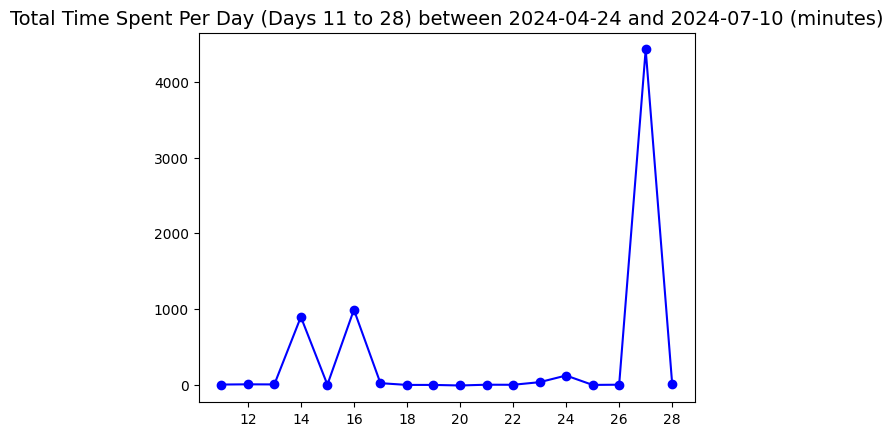

In [ ]:
plt.plot([11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28], total_time_spent_per_day[10:], marker='o', linestyle='-', color='b')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Total Time Spent Per Day (Days 11 to 28) between 2024-04-24 and 2024-07-10 (minutes)", fontsize=14)
plt.show()

## Examining the Users who return within a day (28-day period in 2024)

In [ ]:
# Convert timestamp to datetime
first_period_2024['timestamp'] = pd.to_datetime(first_period_2024['client_event_time'])

# Sort by user and timestamp
first_period_2024 = first_period_2024.sort_values(by=['user_id', 'client_event_time'])

# Calculate time difference between visits for each user
first_period_2024['time_diff'] = first_period_2024.groupby('user_id')['client_event_time'].diff()

# Define the threshold for "return" (e.g., 1 day)
return_threshold = pd.Timedelta(days=1)

# Apply the comparison element-wise
first_period_2024['is_return'] = first_period_2024['time_diff'].apply(lambda x: x <= return_threshold if pd.notnull(x) else False)

# Display the dataframe with return status
print(first_period_2024)

                                  $insert_id  amplitude_id     app       city  \
660339  5019b94b-e1fc-4ff8-8ad3-e9bfd1c5d632  857540567657  591532   New York   
660340  d55b2352-7edc-4135-9e79-3ea32286bf1e  857540567657  591532   New York   
660341  0c121ebf-4e19-427c-a2b1-6e2529df7187  857540567657  591532   New York   
660342  7cd24445-ab8f-484a-b560-8d189d7de9ac  857540567657  591532   New York   
660343  4e33af74-2cfd-44cd-ab9b-b91732b0aba9  857540567657  591532   New York   
...                                      ...           ...     ...        ...   
580851  9d38dd43-76d6-4112-8dbd-9d61e81fd29d  891686495132  591532    Chicago   
522250  a165a972-31ec-4dfb-b4b4-b118365aba87  892725872991  591532   Boardman   
581390  fd1932e8-5a92-4cd0-95ee-cfeed02be675  893717073725  591532  Maryville   
602627  f0146dc8-2787-4eb8-986b-135de5b9ebb6  893617884867  591532   Boardman   
617649  8418806c-56b1-4db2-b33f-59cf509219ba  894506692727  591532   Boardman   

             client_event_t

/var/folders/rw/2_yr05hd56b1rkq4976bf6w00000gn/T/ipykernel_32657/470091561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_period_2024['timestamp'] = pd.to_datetime(first_period_2024['client_event_time'])


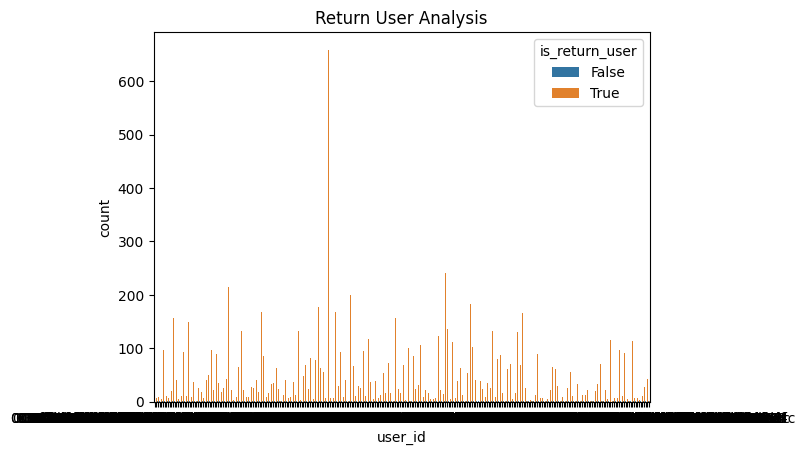

In [ ]:
# Find the first interaction for each user
first_interaction = first_period_2024.groupby('user_id')['client_event_time'].min().reset_index()
first_interaction.columns = ['user_id', 'first_timestamp']

# Merge with the original data
df_with_first = pd.merge(first_period_2024, first_interaction, on='user_id')

# Calculate return time (difference between visit and first interaction)
df_with_first['time_from_first'] = df_with_first['client_event_time'] - df_with_first['first_timestamp']

# Flag return users (if time_from_first > 0 means return visit)
df_with_first['is_return_user'] = df_with_first['time_from_first'] > pd.Timedelta(0)

# Plot the return rate by user
sns.countplot(data=df_with_first, x='user_id', hue='is_return_user')
plt.title('Return User Analysis')
plt.show()

# Examining the Cohort Analysis per Day of the 28-day Period (2024)

In [ ]:
# Define cohorts based on the first registration date (e.g., by month)
df_with_first['cohort'] = df_with_first['first_timestamp'].dt.to_period('D')

# Group by cohort and calculate return rates
cohort_analysis = df_with_first.groupby(['cohort', 'is_return_user']).size().unstack(fill_value=0)

# Calculate return rate for each cohort
cohort_analysis['return_rate'] = cohort_analysis[True] / (cohort_analysis[True] + cohort_analysis[False])

# Display cohort analysis
print(cohort_analysis)

is_return_user  False  True  return_rate
cohort                                  
2024-04-14          2   297     0.993311
2024-04-16          2    34     0.944444
2024-04-17          2    65     0.970149
2024-04-18         31   516     0.943327
2024-04-20          3   494     0.993964
2024-04-22         80  4966     0.984146
2024-04-24          6   201     0.971014
2024-04-25         45  1556     0.971893
2024-04-26          3   217     0.986364
2024-04-29         66  3257     0.980138
2024-04-30         21  1150     0.982067
2024-05-03          2    29     0.935484
2024-05-06         13   231     0.946721
2024-05-07         17   187     0.916667
2024-05-10          3    11     0.785714
2024-05-11          1   183     0.994565


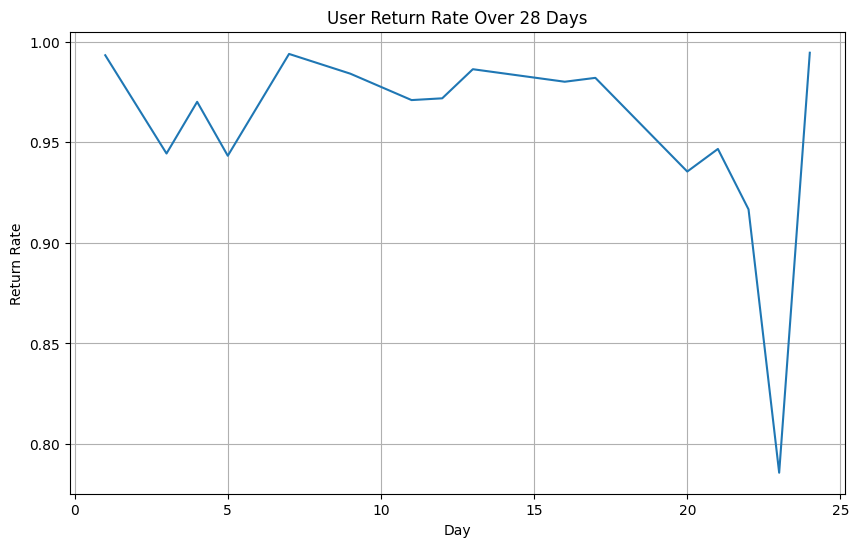

In [ ]:
# Plot return rate over the 28-day period
plt.figure(figsize=(10, 6))
sns.lineplot(data=cohort_analysis, x=[1,3,4,5,7,9,11,12,13,16,17,20,21,22,23,24], y='return_rate')
plt.title('User Return Rate Over 28 Days')
plt.xlabel('Day')
plt.ylabel('Return Rate')
plt.grid(True)
plt.show()

### Key Insights on Stickiness in 2024
- A significant drop in user return rate from the 20th day to the 23rd day which a spike follows shortly after
- A drop right at the beginning after an attempt from a user, which could be a result of troubleshooting issues and getting familiar with the software